# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.sample(7)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13760,HEALTH CENTER NORTHWEST,270087,MT,READM-30-AMI-HRRP,Not Available,5.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
155,METHODIST HOSPITALS INC,150002,IN,READM-30-PN-HRRP,562,NaN,1.2491,24.0,19.2,149.0,07/01/2010,06/30/2013
3386,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,30118,AZ,READM-30-PN-HRRP,208,NaN,1.0533,15.8,15.0,36.0,07/01/2010,06/30/2013
16636,TEMECULA VALLEY HOSPITAL,50775,CA,READM-30-AMI-HRRP,Not Available,5.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14399,GLENWOOD REGIONAL MEDICAL CENTER,190160,LA,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
10640,CYPRESS FAIRBANKS MEDICAL CENTER,450716,TX,READM-30-PN-HRRP,157,NaN,0.9436,17.5,18.6,24.0,07/01/2010,06/30/2013
10487,ST LUKE'S PATIENTS MEDICAL CENTER,670031,TX,READM-30-HF-HRRP,215,NaN,0.9465,22.0,23.2,44.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/subir_das1/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


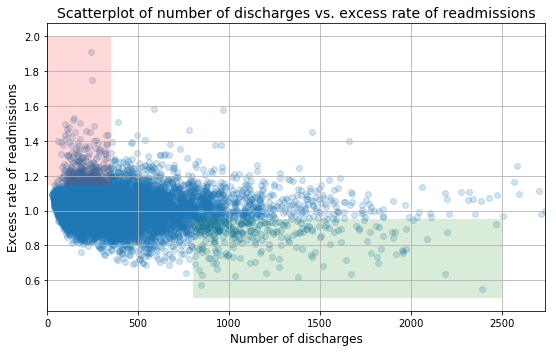

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

The observation is derived based on ration between predicted/expected where the expected value is just an average value. We need to consider other factors like quality of care(patients vs. Doctors ration), hospital capacity among other factors before jumping to conclusion.


$H_0$: Readmission rate in is equal in the groups i.e. $\mu_0$=$\mu_1$=$\mu_2$
$H_A$: Statistically significantly different from each other

We will use one-way ANOVA test to check whether any of those means are statistically significantly different from each other as goverment is making policy decision based on means.

https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php


Main assumptions of one-way ANOVA test:

1. The distribution is normally distributed in each group that is being compared in the one-way ANOVA (it is the residuals that need to be normally distributed, but the results will be the same). 

2. Homogeneity of variances - Means that the population variances in each group are equal. 

3. Independence of observations - this is data consideration, observations should be independent



In [6]:
#Spliting the data into three groups for testing.
#clean_hospital_read_df is not a clean copy 

#a) the name is too big 
#b) column names are also too big 
#c) datatype of date column

clean_hospital_read_df.columns=['HospitalName', 'ProviderNumber', 'State', 'MeasureName',
       'NumberOfDischarges', 'Footnote', 'ExcessReadmissionRatio',
       'PredictedReadmissionRate', 'ExpectedReadmissionRate',
       'NumberOfReadmissions', 'StartDate', 'EndDate'] #removing space from column names

df_clean=clean_hospital_read_df.copy() # working with a small df name

### Inspecting the Dataset for missing values

In [7]:
print('Number of null values:\n',df_clean.isnull().sum())
df_clean.info()

Number of null values:
 HospitalName                    0
ProviderNumber                  0
State                           0
MeasureName                     0
NumberOfDischarges              0
Footnote                    11497
ExcessReadmissionRatio         81
PredictedReadmissionRate       81
ExpectedReadmissionRate        81
NumberOfReadmissions           81
StartDate                       0
EndDate                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
HospitalName                11578 non-null object
ProviderNumber              11578 non-null int64
State                       11578 non-null object
MeasureName                 11578 non-null object
NumberOfDischarges          11578 non-null int64
Footnote                    81 non-null float64
ExcessReadmissionRatio      11497 non-null float64
PredictedReadmissionRate    11497 non-null float64
ExpectedReadmissionRate     11497 non-null f

### Handling Missing Data
Option 1: we can fill the missing data my imputing it median. Sample code:

def impute_median(series):

    return series.fillna(series.median())

df_clean.ExcessReadmissionRatio. transform(impute_median)    

Option 2: We can ignore/drop all missing rows since we only have 81 such records. 

In [11]:
#Creating three groups based on discharges and using option 2 for missing data
group_1=df_clean[['NumberOfDischarges', 'ExcessReadmissionRatio']] \
                [(df_clean.NumberOfDischarges<100) & \
                (df_clean.NumberOfDischarges.notnull()) & \
                (df_clean.ExcessReadmissionRatio.notnull())]

group_2=df_clean[['NumberOfDischarges', 'ExcessReadmissionRatio']] \
                [(df_clean.NumberOfDischarges>1000) & \
                (df_clean.NumberOfDischarges.notnull()) & \
                (df_clean.ExcessReadmissionRatio.notnull())]

group_3=df_clean[['NumberOfDischarges', 'ExcessReadmissionRatio']] \
                [(df_clean.NumberOfDischarges>=100) & (df_clean.NumberOfDischarges<=1000) & \
                (df_clean.NumberOfDischarges.notnull()) & \
                (df_clean.ExcessReadmissionRatio.notnull())]

In [12]:
import datetime as dt
from datetime import datetime
from pytz import timezone

#adding identifications and logdate data
tz = timezone('EST') # finding time zone info
datetime.now(tz) 

group_1.assign(Group=1,GrpCreationDate=dt.datetime.now())
group_2.assign(Group=2,GrpCreationDate=dt.datetime.now())
group_3.assign(Group=3,GrpCreationDate=dt.datetime.now())

,NumberOfDischarges,ExcessReadmissionRatio,Group,GrpCreationDate
10346,100,0.9488,3,2018-01-07 21:15:36.587141
7507,100,0.9886,3,2018-01-07 21:15:36.587141
4373,100,1.0351,3,2018-01-07 21:15:36.587141
10658,100,0.9431,3,2018-01-07 21:15:36.587141
9777,100,0.9577,3,2018-01-07 21:15:36.587141
12286,100,0.9040,3,2018-01-07 21:15:36.587141
3936,100,1.0424,3,2018-01-07 21:15:36.587141
11276,100,0.9307,3,2018-01-07 21:15:36.587141
4037,100,1.0407,3,2018-01-07 21:15:36.587141
5794,100,1.0129,3,2018-01-07 21:15:36.587141


# Checking assumptions of one-way ANOVA test

## Normality Test

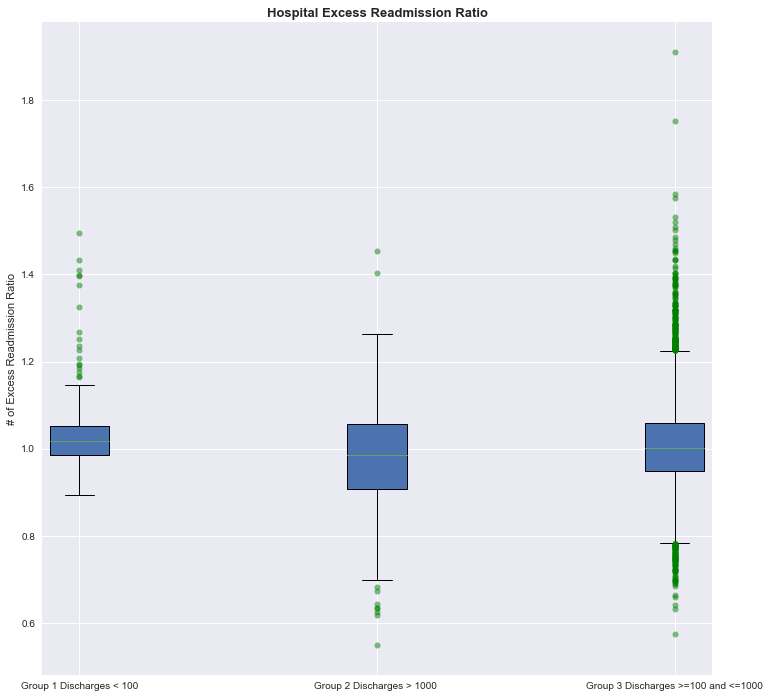

In [51]:
fig, axes = plt.subplots(figsize=(12, 12))
_=plt.title('Hospital Excess Readmission Ratio', fontsize=13, fontweight='bold')
axes.set_ylabel('# of Excess Readmission Ratio')

_ = axes.boxplot(
    [group_1.ExcessReadmissionRatio,group_2.ExcessReadmissionRatio,group_3.ExcessReadmissionRatio], \
    positions = [1, 5,9], \
    labels = ['Group 1 Discharges < 100','Group 2 Discharges > 1000 ','Group 3 Discharges >=100 and <=1000'], \
    patch_artist = True, widths = 0.8,showfliers=True,sym='gx')

for flier in _['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=.5)

### Observation:
    Variance between group 2 and Group 3 is very small compared to Group 1.

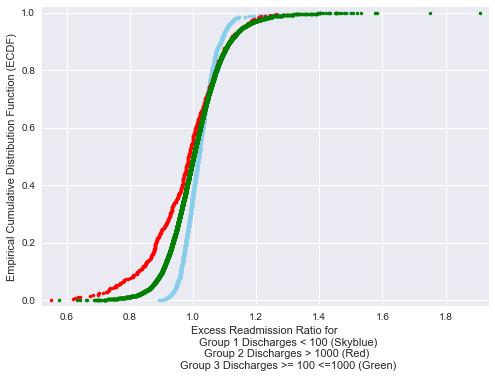

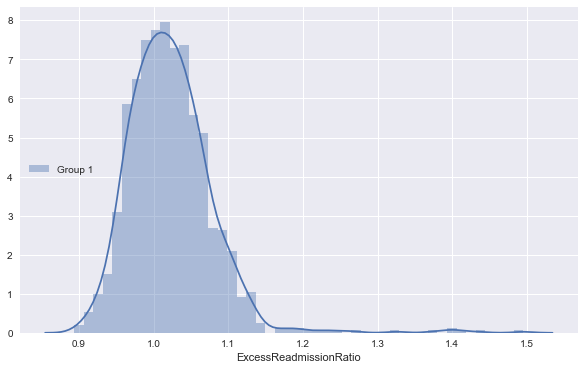

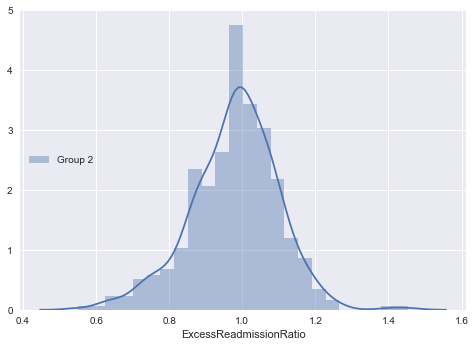

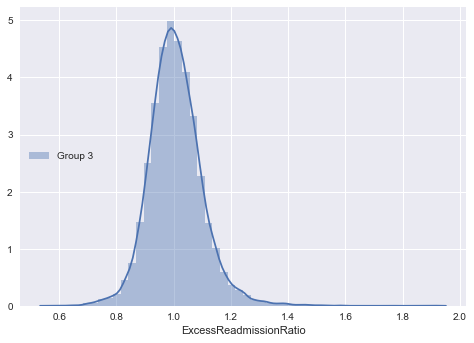

In [32]:
#Empirical Cumulative Distribution Function (ECDF)
import numpy as np
x=sorted(group_1.ExcessReadmissionRatio)
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none',color='skyblue')
#_=plt.xlabel('Excess Readmission Ratio for Group 1 (Discharges < 100)')
#_=plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.margins(0.02)

x=sorted(group_2.ExcessReadmissionRatio)
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none',color='red')
#_=plt.xlabel('Excess Readmission Ratio for Group 2 (Discharges > 1000)')
#_=plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.margins(0.02)

x=sorted(group_3.ExcessReadmissionRatio)
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none',color='green')
_=plt.xlabel('Excess Readmission Ratio for \n  \
              Group 1 Discharges < 100 (Skyblue) \n \
              Group 2 Discharges > 1000 (Red) \n \
              Group 3 Discharges >= 100 <=1000 (Green)')
_=plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.margins(0.02)


fig = plt.figure(figsize = (10,6))
sns.distplot(group_1['ExcessReadmissionRatio'],label= "Group 1")
_=plt.legend(loc='center left')
plt.show()
sns.distplot(group_2['ExcessReadmissionRatio'],label= "Group 2")
_=plt.legend(loc='center left')
plt.show()
sns.distplot(group_3['ExcessReadmissionRatio'],label= "Group 3")
_=plt.legend(loc='center left')
plt.show()

We can see that Group 2's Excess Readmission Ratio may not be normally distributed. We may have to nonparametric Kruskal-Wallis H Test which does not require the assumption of normality. 

In [62]:
from scipy import stats
print('Group 1 -pValue: ',stats.normaltest(group_1.ExcessReadmissionRatio)[1])
print('Group 2 -pValue: ',stats.normaltest(group_2.ExcessReadmissionRatio)[1])
print('Group 3 -pValue: ',stats.normaltest(group_3.ExcessReadmissionRatio)[1])

Group 1 -pValue:  7.95810938995e-133
Group 2 -pValue:  0.000235487436528
Group 3 -pValue:  2.65376255289e-307


Based on the above pValue we will go for Kruskal-Wallis H Test which does not require the assumption of normality.

In [66]:
print('Kruskal-Wallis H Test:', stats.kruskal(group_1.ExcessReadmissionRatio, \
                                              group_2.ExcessReadmissionRatio, \
                                              group_3.ExcessReadmissionRatio))

Kruskal-Wallis H Test: KruskalResult(statistic=85.166547058150257, pvalue=3.2086273787056317e-19)


### Observation:
Based on statistical data we can reject the $H_0$ i.e. Excess readmission ratio is statistically significant between the groups. 

# Conclusion:

The above data-based observations cannot be used to make "Regulatory policy recommendations" like "consolidation of hospitals and facilities" and "Quality care is directly proportional to Hospital Capacity." One needs to consider many other confounding factors and non-domain data like travel, migration, marriage before considering the impact of "Regulatory policy" specially consolidations.